<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_ECDA_2425/blob/main/Big%20Data%20Analytics/BDAO_Data_cleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing for Online Retail Dataset

This notebook outlines the data preprocessing steps applied to the Online Retail Dataset. The objective is to clean and prepare the dataset and do exploratory data analysis (EDA) to gain initial insights from the data. Each step is crucial for ensuring that the data is clean, relevant, and formatted correctly for further analysis or modeling.

---


### 1. Importing Libraries and Loading the Dataset

First, we import the necessary libraries and load the dataset we want to analyse.

In [ ]:
# Import Libraries
import pandas as pd # we use this library for creating and managing dataframe
import matplotlib.pyplot as plt # we use this for visualisation
import seaborn as sns # we use this for visualisation

Then, we need to first upload the data into cloud and then load the dataset into a pandas DataFrame.

To upload the file, please click "files" (icon) in the menu on the left and then click "upload" (icon) to upload the dataset we are using for this task. Once this notebook is disconnected, your data will be removed. Thus, next time when you want to resume the analysis, you need to re-upload the data. In the future, if you want to work on other dataset, you can also upload other dataset as you wish.

An alternative way to upload the file is that you can run the code and then upload the file as shown below:


```
# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()
```



Now that the dataset has been uploaded, we can read and load the data into pandas dataframe.

In [ ]:
# Load the dataset
df = pd.read_csv('/content/OnlineRetail.csv',encoding='ISO-8859-1')
# The encoding='ISO-8859-1' argument is telling the pd.read_csv() function how to interpret the characters in the 'merged_online_retail_II.csv' file.
# 'ISO-8859-1' (also known as 'latin1') is a specific character encoding standard. It's often used for Western European languages.
# Thus, if your data is not in Western European languages, you should remove or change the encoding

### 2. Check the data and understand the data

We can now start checking the dataset using different [Pandas functions](https://www.geeksforgeeks.org/pandas-functions-in-python/)

First, we check the size of the dataset using `dataframe.shape()`, then check the first five rows or last five rows of the dataset using `dataframe.head()` and `dataframe.tail()`

In [ ]:
print("Size of the dataset:")
df.shape

Size of the dataset:


(541909, 8)

In [ ]:
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
print("Last five rows of the dataset:")
df.tail()

Last five rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


Then we will further check the dataset to identify data type, and whether there are missing values and duplicates.

In [ ]:
# First, check and print the number of missing values (if there are any) in the dataset
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


This returned result shows us there are two columns with missing values. We will need to think whether these missing values have big impact on our analysis and what we should do later.

In [ ]:
# Then, check the total number of duplicate rows (if there are any) in the dataset
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
5268


This returned result shows us there are 5268 duplicate rows. We will need to remove them later.

In [ ]:
# Last, check the data type of data in each column
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


**Common data types you might see include:**

**object**: Typically represents strings (text)

**int64**: Represents integers (whole numbers)

**float64**: Represents floating-point numbers (numbers with decimal points)

**datetime64**: Represents dates and times

In this dataset, we have string data, integers and float numbers.One thing we have spot is that the `InvoiceDate` is not in Datetime format,so if you want it to be datetime format we will need to do transformation later.



---
### 3. Data cleaning

After we checked the data, we noticed that there are missing values and duplicates. And there is potential changes of data tpe we can make as well. We will do some basic data cleaning in this part.

Observe that the attributes Description and CustomerID contains missing values. We will deal with missing values by dropping rows with missing CustomerID values (as the dataset is big) and filling missing descriptions values with the string "No Description" if there is still with missing value after you drop the column with missing Customer ID

Additinally, we will remove duplicates.

In [ ]:
# 1. Handling missing values
# Drop rows where customer ID is empty/missing as it's essential for our analysis
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
# After removing rows with missing customer ID, we will check the missing value again
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Given that now there is no missing value after we deal with customer ID column, we will move on to the next step.

In [ ]:
# 2. Removing duplicates
# Drop duplicate rows to ensure data quality
df.drop_duplicates(inplace=True)

In [ ]:
# Now we will print the size of the data again and we notice the data has reduced to 797883 rows from 1044846
print(df.shape)

(401604, 8)


---
### 4. Data Transformation

Transforming data into a suitable format for analysis is crucial. We convert the InvoiceDate from string to datetime and create new columns for Year, Month, Day, and TotalSales.

In [ ]:
# Convert InvoiceDate from string to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting Year, Month, Day for further analysis
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

# Creating a 'TotalPrice' column for each row
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Since we changed the data types of the column, we will check the data type again to see it works
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Year                    int32
Month                   int32
Day                     int32
TotalSales            float64
dtype: object


In [ ]:
# Now we can check the data after transformation
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


---

# EDA Analysis

The primary goal of EDA is to examine the data and to gain some initial insights from data.

We can first summarise the data using descriptive analytics and then we can create different plots to assist in getting data insights.

Following EDA, we might further clean or transform our data to fit into our analystics needs.


In [ ]:
# We get summary statistics of our data
# Check max, min, mean and standard deviation.
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,TotalSales
count,401604.000000,401604,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,2010.934378,7.595407,15.038623,20.613638
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,2010.000000,1.000000,1.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,2011.000000,5.000000,7.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,2011.000000,8.000000,15.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,2011.000000,11.000000,22.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011.000000,12.000000,31.000000,168469.600000
std,250.283037,NaN,69.764035,1714.006089,0.247620,3.417451,8.652640,430.352218


We have noticed that there are negative values in the quantity column. This could be because the invoice is also recording the return orders. Then this gives us ideas when it comes to analysis that we might need to segment the orders into purchase and return and analyse them separately. Anothing we spot is that there are products with price of 0. Are they free products? The range of price is really large. We might need to further investigate it. This descriptive statistics can bring us some ideas how our data look like.

In [ ]:
# Here we further check how many invoice with negative quantity
len(df[df['Quantity'] < 0])

8872

In [ ]:
# Here we further check how many invoice with 0 price
len(df[df['UnitPrice']==0])

40

In [ ]:
# Given we have large amount of data, we will remove the data with negative quantity and price of 0 and store the new data as order data
order = df[(df['Quantity'] > 0) & (df['UnitPrice']>0)]
order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34


Next we will start exploring the data using visualisation.

Text(0.5, 0, 'Country')

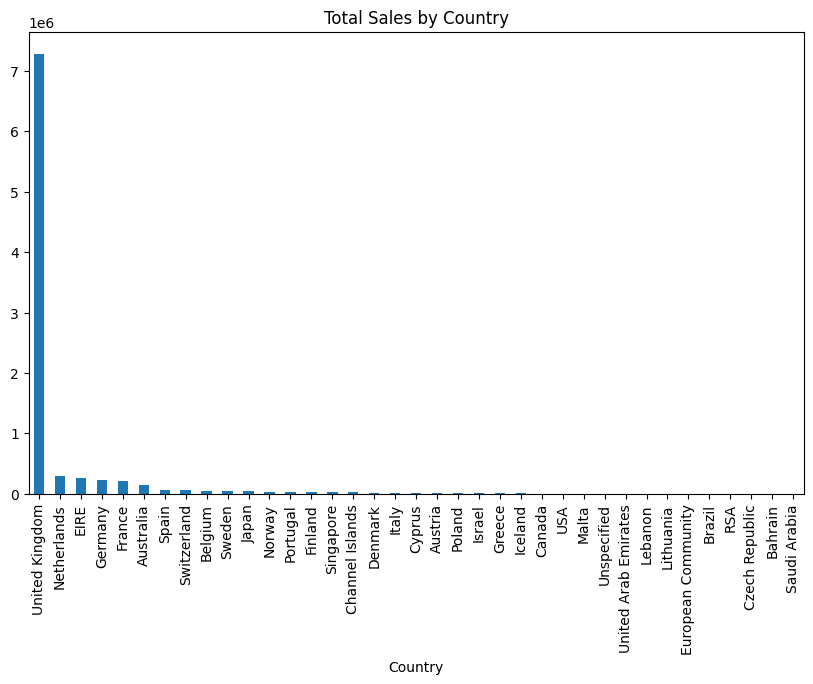

In [ ]:
# create bar chart to check total sales by Country with sorting
plt.figure(figsize=(10, 6))
order.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

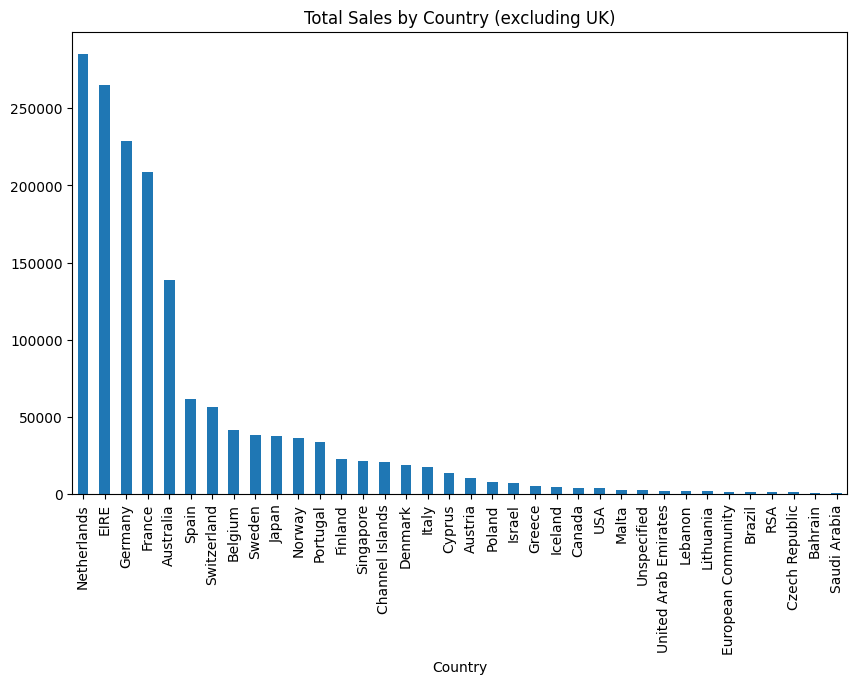

In [ ]:
# create bar chart to check total sales by Country (excluding UK) with sorting
plt.figure(figsize=(10, 6))
order[order['Country'] != 'United Kingdom'].groupby('Country')['TotalSales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Country (excluding UK)')
plt

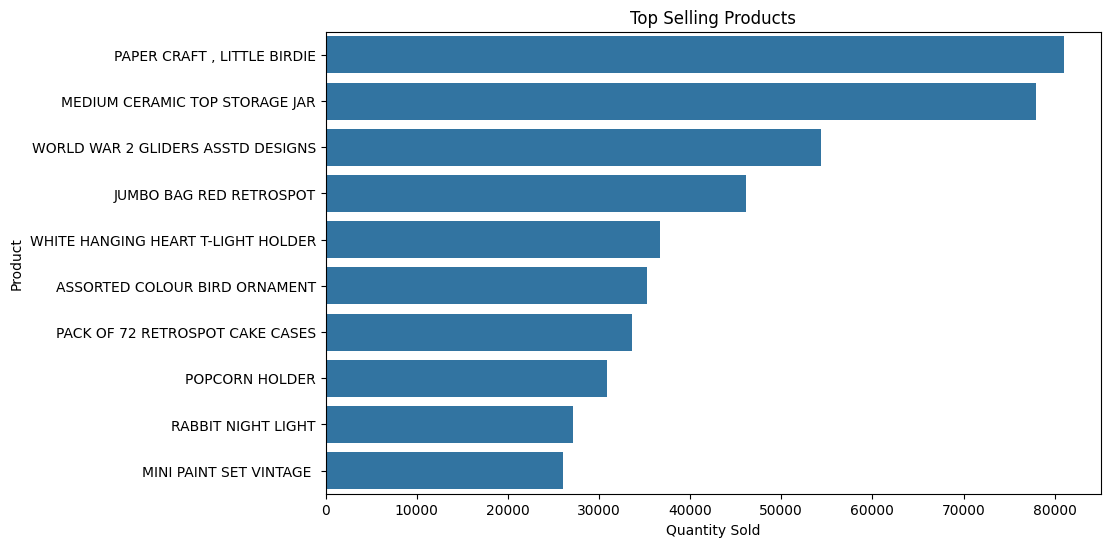

In [ ]:
# Top Selling Products
top_products = order.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products, y=top_products.index)
plt.title('Top Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

Text(0, 0.5, 'Quantity Sold')

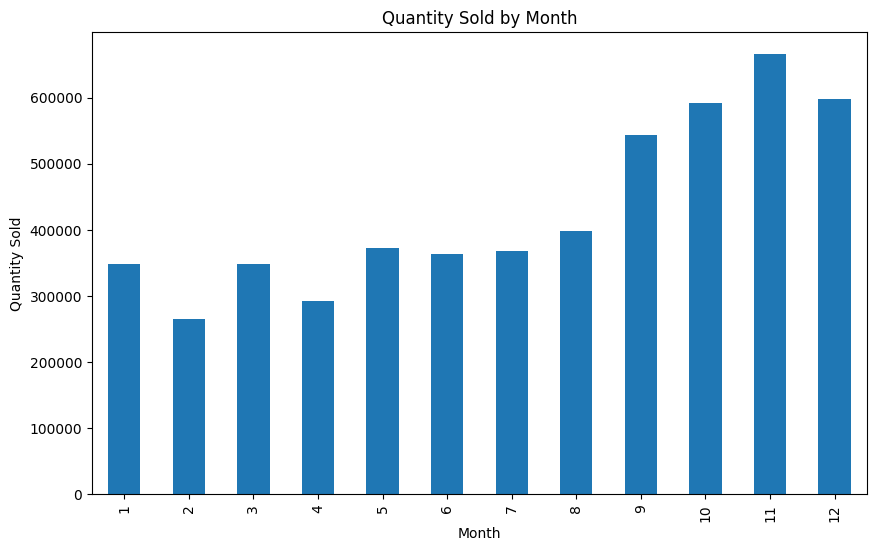

In [ ]:
# create bar chart to check quantity by month
plt.figure(figsize=(10, 6))
order.groupby('Month')['Quantity'].sum().plot(kind='bar')
plt.title('Quantity Sold by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')

Text(0, 0.5, 'Quantity Sold')

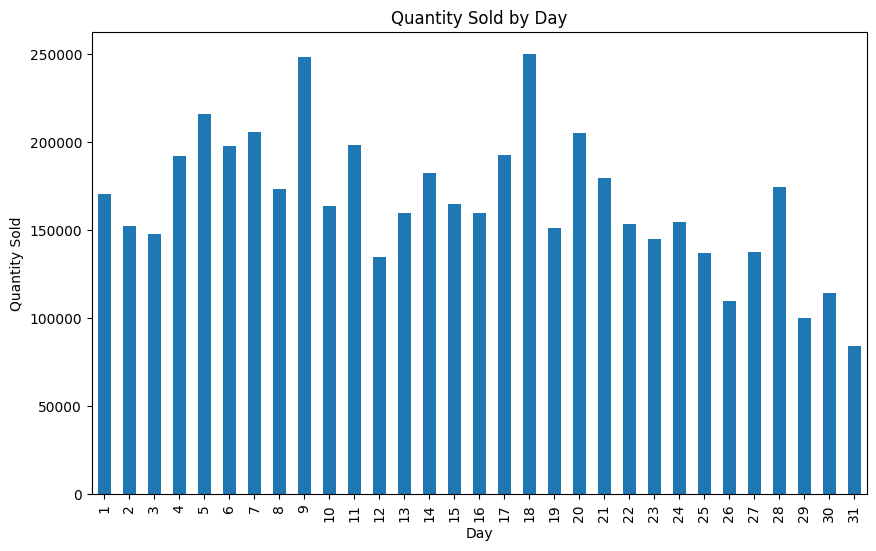

In [ ]:
# create bar chart to check quantity by day
plt.figure(figsize=(10, 6))
order.groupby('Day')['Quantity'].sum().plot(kind='bar')
plt.title('Quantity Sold by Day')
plt.xlabel('Day')
plt.ylabel('Quantity Sold')

Text(0, 0.5, 'Quantity Sold')

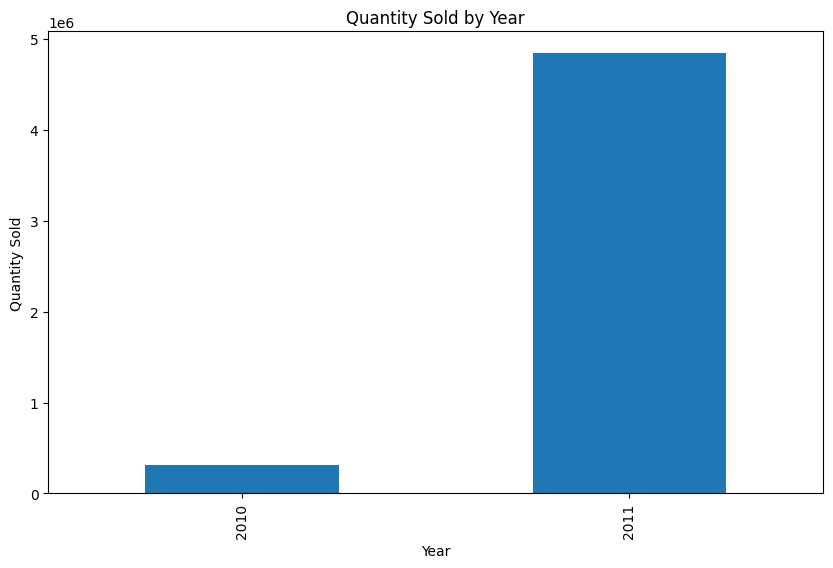

In [ ]:
# create bar chart to check quantity by year
plt.figure(figsize=(10, 6))
order.groupby('Year')['Quantity'].sum().plot(kind='bar')
plt.title('Quantity Sold by Year')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')

Text(0, 0.5, 'Total Sales')

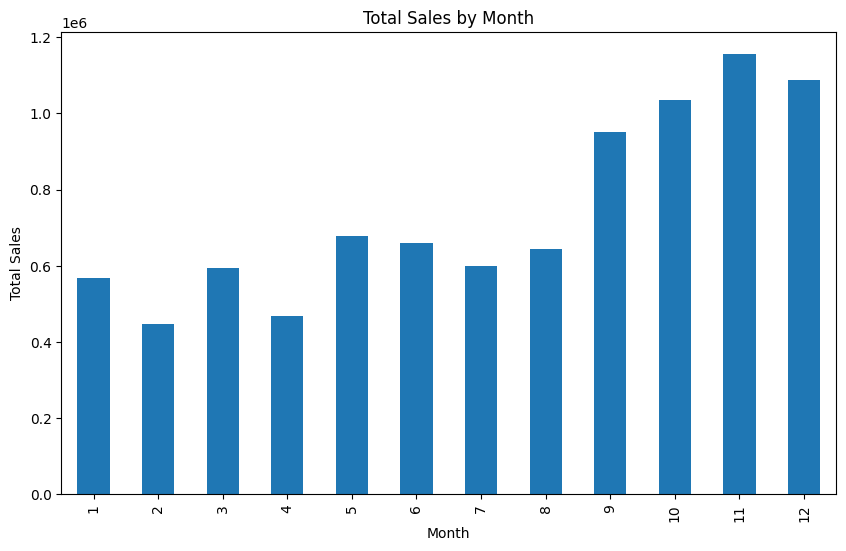

In [ ]:
# create bar chart to check total sales by month
plt.figure(figsize=(10, 6))
order.groupby('Month')['TotalSales'].sum().plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

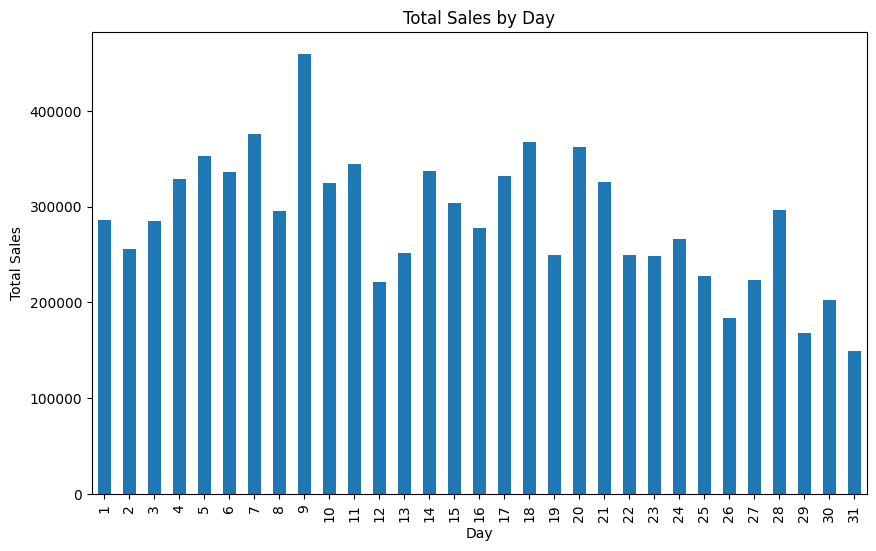

In [ ]:
# create bar chart to check total sales by day
plt.figure(figsize=(10, 6))
order.groupby('Day')['TotalSales'].sum().plot(kind='bar')
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')

Text(0, 0.5, 'TotalSales')

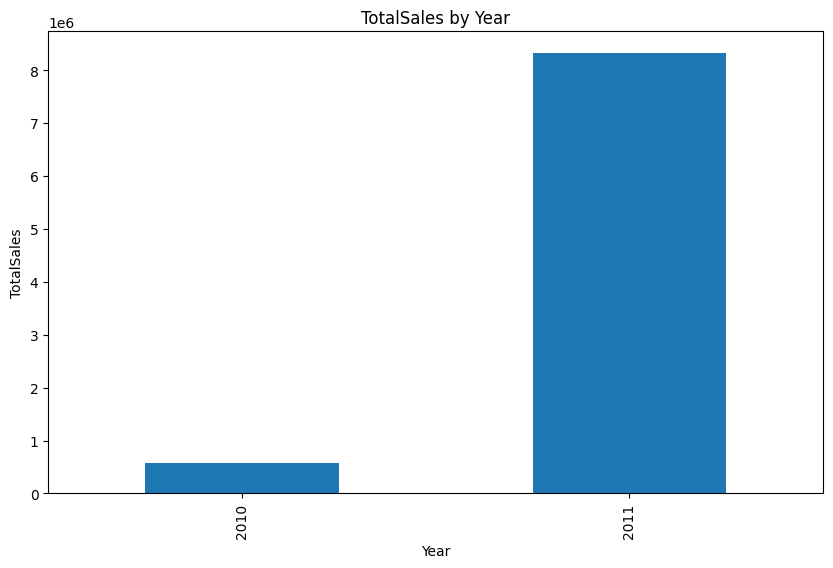

In [ ]:
# create bar chart to check TotalSales by year
plt.figure(figsize=(10, 6))
order.groupby('Year')['TotalSales'].sum().plot(kind='bar')
plt.title('TotalSales by Year')
plt.xlabel('Year')
plt.ylabel('TotalSales')

Text(0, 0.5, 'Quantity')

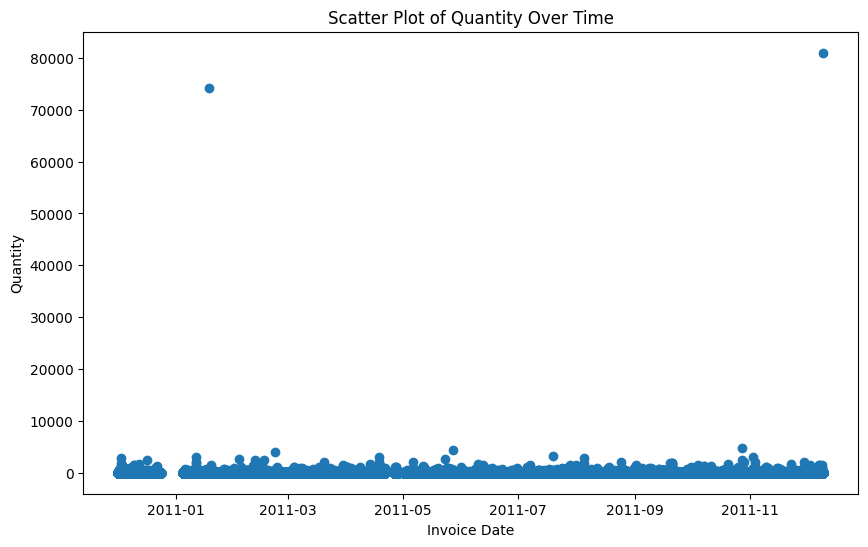

In [ ]:
# scatter plot of quantity following datetime
plt.figure(figsize=(10, 6))
plt.scatter(order['InvoiceDate'], order['Quantity'])
plt.title('Scatter Plot of Quantity Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Quantity')

In [ ]:
order[order['Quantity']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalSales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011,1,18,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,2011,12,9,168469.6


Text(0, 0.5, 'Unit Price')

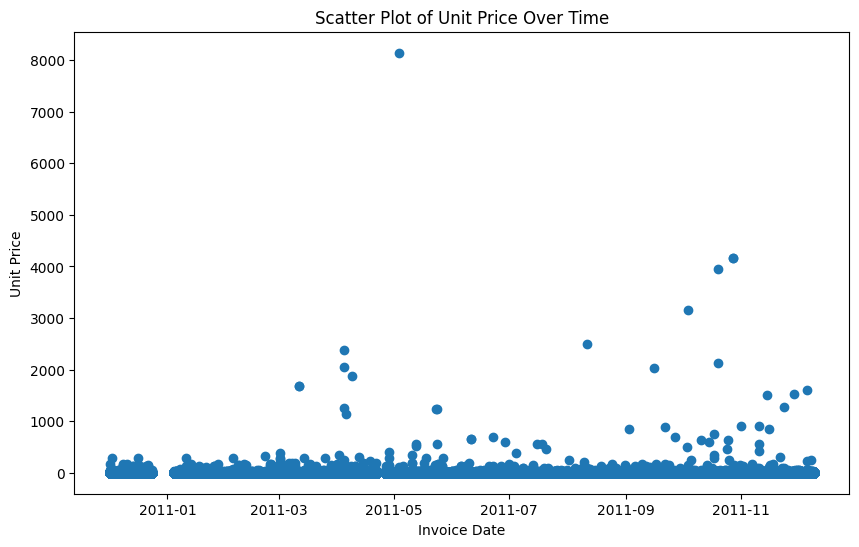

In [ ]:
# plot the scatter plot of unit price following datetime
plt.figure(figsize=(10, 6))
plt.scatter(order['InvoiceDate'], order['UnitPrice'])
plt.title('Scatter Plot of Unit Price Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Unit Price')

Text(0, 0.5, 'Total Sales')

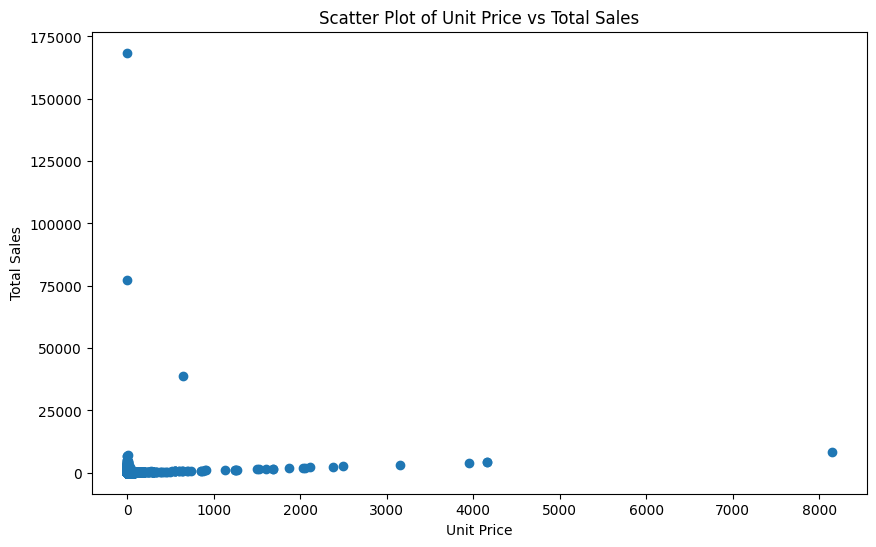

In [ ]:
# plot the scatter plot of unit price and total sales
plt.figure(figsize=(10, 6))
plt.scatter(order['UnitPrice'], order['TotalSales'])
plt.title('Scatter Plot of Unit Price vs Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

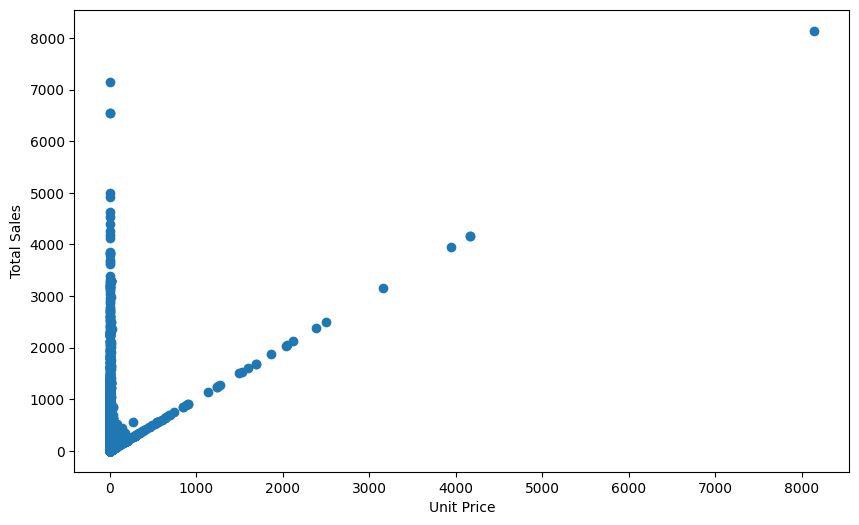

In [ ]:
# plot the scatter plot of unit price and total sales (excluding total sales >25000)
plt.figure(figsize=(10, 6))
plt.scatter(order[order['TotalSales']<25000]['UnitPrice'], order[order['TotalSales']<25000]['TotalSales'])
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

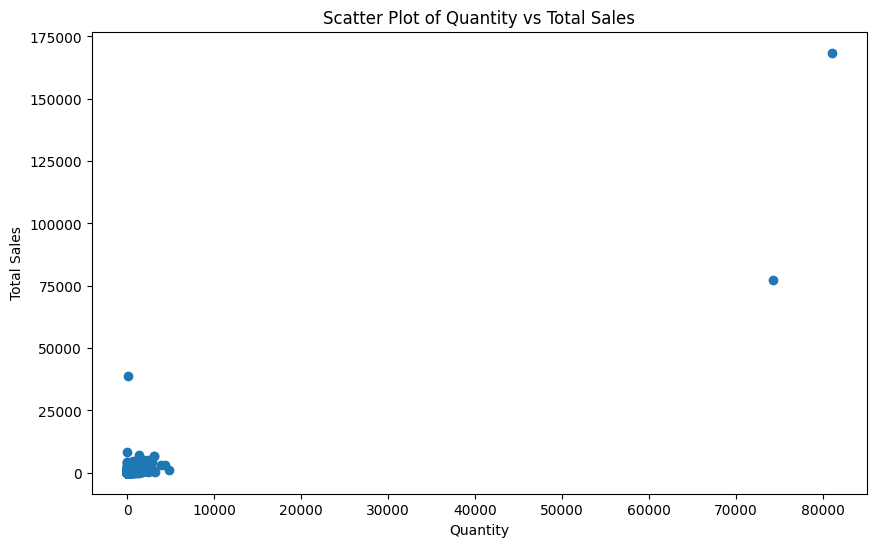

In [ ]:
# plot the scatter plot of quantity and total sales
plt.figure(figsize=(10, 6))
plt.scatter(order['Quantity'], order['TotalSales'])
plt.title('Scatter Plot of Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

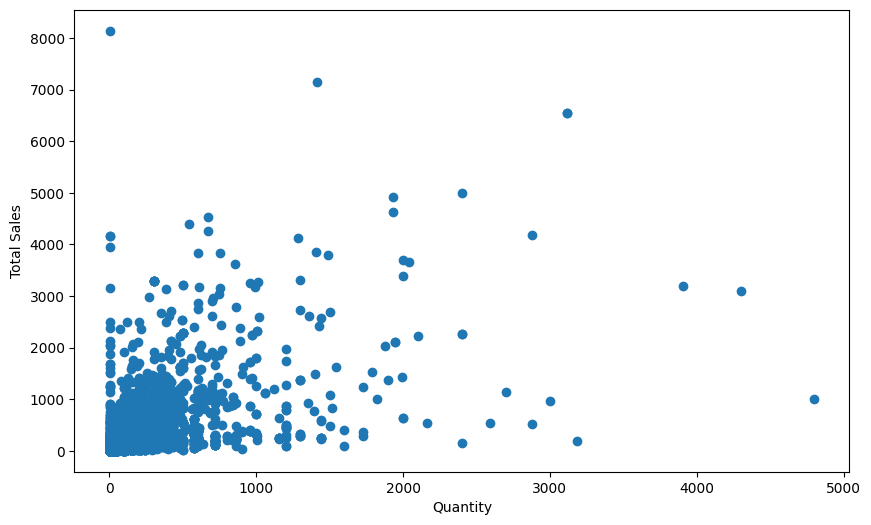

In [ ]:
# plot the scatter plot of quantity and total sales (excluding total sales>10000)
plt.figure(figsize=(10, 6))
plt.scatter(order[order['TotalSales']<10000]['Quantity'], order[order['TotalSales']<10000]['TotalSales'])
plt.xlabel('Quantity')
plt.ylabel('Total Sales')

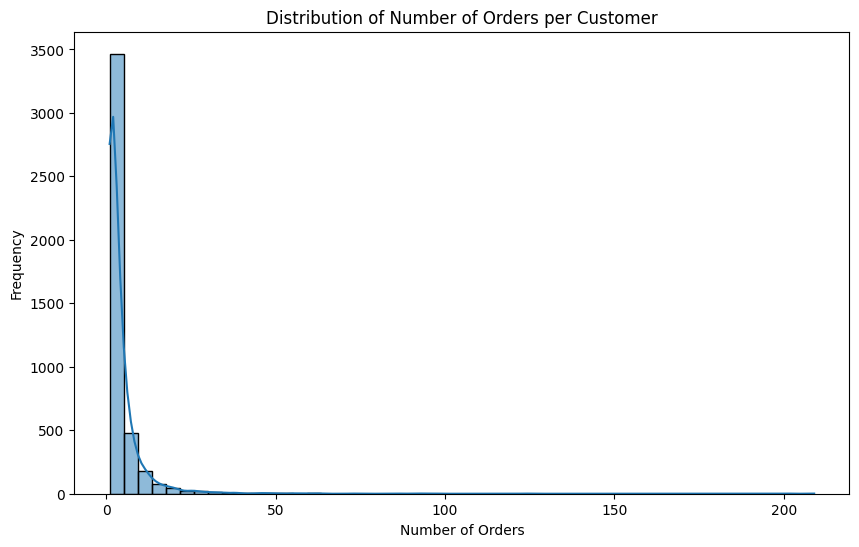

In [ ]:
# Distribution of Number of Orders per Customer
orders_per_customer = order.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer, bins=50, kde=True)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
#plt.suptitle('Fig.5: Distribution of Number of Orders per Customer')
plt.show()

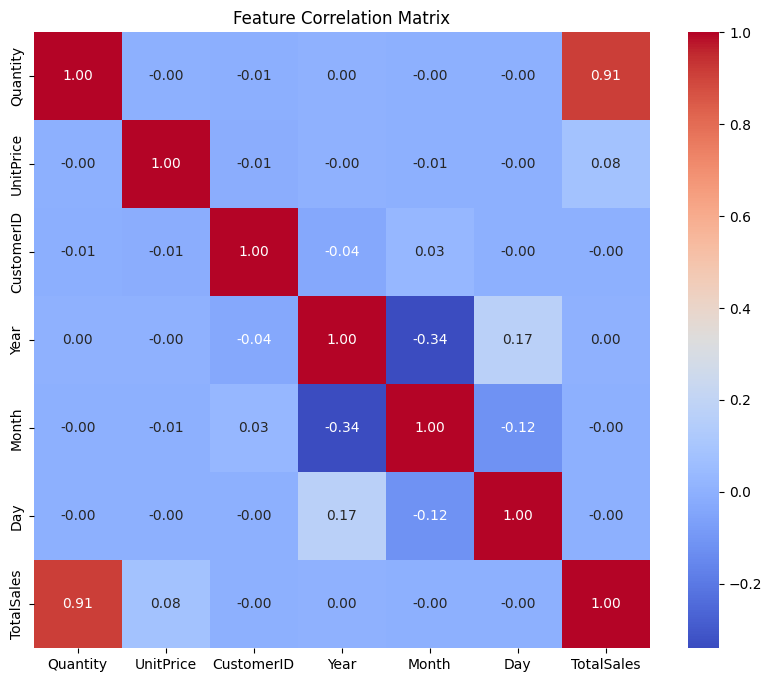

In [ ]:
# Compute the correlation matrix to identify relationships between variables
correlation_matrix = order.corr(numeric_only=True)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

Congratulations! You have done the data cleaning and some data exploration. There is another dataset in Moodle that you can use to practice what you have learned here. Please take some time to do it in your spare time.